## Learning Overview & Session Takeaways

The objective of this session is to build an understanding of logistic regression and how to implement it.

Concretely, by the end of this session, you will be able to:
    1. explain the concept of classification in machine learning (ML)
    2. articulate the difference between linear and logistic regression
    3. define logistic regression
    4. understand logistic regression's cost function and the gradient descent optimization procedure
    5. determine what metrics to evaluate the performance of logistic regression
    6. implement logistic regression in scikit-learn

## What is Classification?

In the domain of supervised machine learning, there are two main problems:
    1. Regression
    2. Classification

Regression problems deal with the prediction of continuous outcomes. Some examples of regression problems are predicting:
    - real number outcomes: profits
    - real number positive outcomes: stock prices
    - integer outcomes: number of products purchased

Classification problems, on the other hand, deal with the the prediction of a categorical outcome. Some examples of classification problems are predicting:
    - binary outcomes: will a borrower default on a loan
    - multi-class outcomes: whether an image contains a dog, cat or bear 
    - multi-label outcomes: topics in a document (e.g. religion, science, crime, weather)
    - ordinal outcomes: customer satisfaction rating (e.g. 1-star, 2-star, etc)
    
For the purpose of this session, we will be focusing on binary outcome prediction problems.

## Binary Classification: Linear or Logistic Regression?

To understand why someone might use linear regression for a binary classification problem, one only needs to look at what a typical binary classification dataset looks like.

In [1]:
import pandas as pd
from IPython.display import display
demo_data = pd.read_csv('./Data/demo/demo.csv')
display(demo_data.head())

,Y,X1,X2
0,1.0,-0.322785,-1.323072
1,0.0,-0.959459,2.255321
2,0.0,-1.782441,1.528056
3,0.0,-1.501145,-2.681421
4,0.0,-0.340096,-4.730189


***Y*** is the target that we are interested in predicting; it has only two possible values: 1.0 or 0.0. This might strike someone as a regression problem suitable for linear regression. Suppose that we proceed to fit a linear regression model to the data.

In [6]:
from sklearn.linear_model import LinearRegression
X = demo_data[['X1', 'X2']].values
y = demo_data['Y'].values
lin_model = LinearRegression() #initialize a linear regression model
lin_model.fit(X,y) # fit the model
predicted_values = lin_model.predict(X) # get predictions
demo_data['Y_hat'] = predicted_values

In [ ]:
import seaborn as sns
sns.scatterplot(x = 'X1', y = 'Y', data = demo_data)
plot = sns.lineplot(x = 'X1', y = 'Y_hat', data = demo_data)
plot.get_figure().savefig('./LR problem')

Let's examine the predictions to see if anything is amiss.

In [3]:
print('The maximum predicted value is: %s' %(str(round(max(predicted_values),2))))
print('The minimum predicted value is: %s' %(str(round(min(predicted_values),2))))

The maximum predicted value is: 1.46
The minimum predicted value is: -0.6


Immediately, we notice that linear regression produces predictions that exceed the range of 0.0 and 1.0.

This is undesirable as it becomes difficult to interpret the predicted value:
    - What does it mean to have a prediction that exceeds 1.0 or is lower than 0.0? 
    - What about values between 0.0 and 1.0? Are they probabilities?

Related to the first issue is the lack of meaning in the coefficients of the linear regression model.

## Logistic Regression to the Rescue

### Desirable Properties

For any classification model, it is desirable to have two properties:
    1. predictions are bounded in the range of 0.0 to 1.0
    2. predictions represent the probability of a data instance belonging to the class labelled as 1.0

Previously, it has been shown that linear regression does not possess the above properties. However, logistic regression does.

### Mathematical Definition

Logistic regression estimates the log-odds of the event that $Y=1$:
$$l =\ln(\frac{p}{1-p}) =\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}$$

where $p$ is defined as defined as the probability of the data instance belonging to the class labelled as 1.0 or $Pr(Y=1)$.

Using the log-odds ($l$), we can easily recover $p$.

First, exponentiate both sides:
$${
e^{(\ln(\frac{p}{1-p}))}  \\
=\frac{p}{1-p}  \\
=e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}
}$$

Then, multiply both sides by $(1-p)$:
$${
p  \\
=e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}\times(1-p)  \\
=e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}} - p\times e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}
}$$

Rearranging, we have:
$$
p+p\times e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}} 
=p\times (1+e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}) 
=e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}
$$
$$
p=\frac{e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}}{1+e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}}\div \frac{e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}}{e^{\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k}}}=\frac{1}{1+e^{-(\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k})}}
$$

In the last equation, we see that $p$ is formulated as a logistic or sigmoid function. 

We can visualize the logistic function to understand some of its properties.

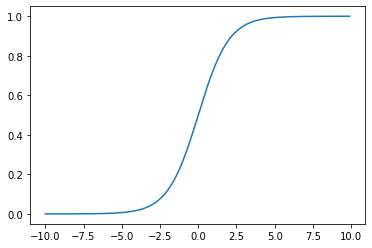

In [10]:
import numpy as np
linear_sum_component = np.arange(-10,10,0.1)
probabilities = np.array(list(map(lambda x: 1/(1+np.exp(-x)), linear_sum_component)))
sns.lineplot(x=linear_sum_component,y=probabilities)

The logistic function is bounded between 0.0 and 1.0 (exclusive). The function never takes on 0.0 or 1.0, only asymptotically. 

It is also symmetric around 0.5 on the y-axis which corresponds to 0.0 on the x-axis, making $\begin{align}p = 0.5\end{align}$ a natural threshold for classiying a data instance as belonging to class label 1.0. Of course, one is free to determine some other threshold to suit the problem at hand (*more on that later*).

### How does Logistic Regression Classify?

Let's build a logistic regression model on the same data and visualize what it does.

[(-5, 5), Text(0, 0.5, '$X_2$'), (-5, 5), Text(0.5, 0, '$X_1$'), None]

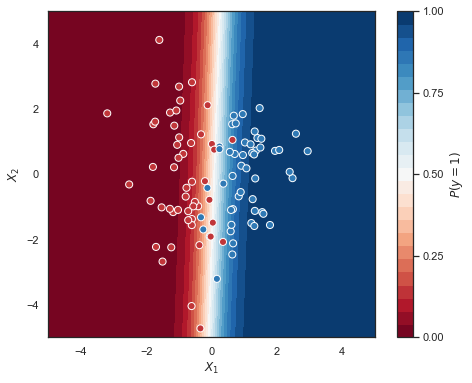

In [16]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs').fit(X,y)

# Make a grid of values and evaluate their probabilities
xx1, xx2 = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = log_model.predict_proba(grid)[:, 1].reshape(xx1.shape)

# Plot the probabilities along with the training data
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx1, xx2, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

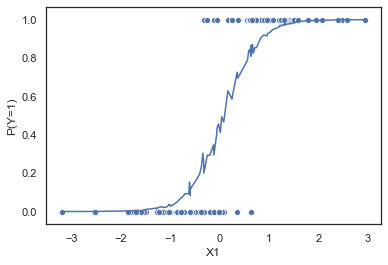

In [15]:
demo_data['P(Y=1)'] = log_model.predict_proba(X)[:,1]
sns.scatterplot(x = 'X1', y = 'Y', data = demo_data)
plot = sns.lineplot(x = 'X1', y = 'P(Y=1)', data = demo_data)
plot.get_figure().savefig('./Logistic Regression Prediction')

In essence, one can understand the objective of logistic regression as learning a set of $\begin{align}\beta_{k} , k=0,1,...,m\end{align}$ that creates the best separating decision boundary. In the plot, that decision boundary corresponds to the white line.

What we also observe is that the decision boundary is imperfect; it does not perfectly separate both classes. This then begs the question of whether we could have found another straight line that better separates both classes.

### Cost Function

To answer the question that concluded the previous sub-section, we will now turn our attention to how that decision boundary was decided upon.

How the model decides the boundary is by minimizing a cost function. The cost function most implementations of logistic regression use is the binary cross entropy loss function.

#### Cost Function Mathematical Definition

Let's first define the probability of the $\begin{align}i\end{align}$-th instance belonging to class 1.0 as:
$$p_{\beta}(X^{(i)}) =  \frac{1}{1+e^{-(\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k})}}$$

Then, the binary cross entropy loss function is defined as:
$$J(\beta)=-\frac{1}{N}\sum_{i=1}^N[y^{(i)}\times\ln(p_{\beta}(X^{(i)})) + (1-y^{(i)})\times\ln(1-p_{\beta}(X^{(i)}))]$$

#### Unpacking Binary Cross Entropy Loss

Let's try to unpack this loss function by first pointing out three facts about it. 

The first fact is that the value of the equation inside the square brackets depends on the true class label:
- When $\begin{align}y^{(i)}=1\end{align}$, the equation inside the square brackets reduces to $\begin{align}ln(p_{\beta}(X^{(i)}))\end{align}$
- When $\begin{align}y^{(i)}=0\end{align}$, the equation inside the square brackets reduces to $\begin{align}ln(1-p_{\beta}(X^{(i)}))\end{align}$

The second fact is that the value of the equation inside the square brackets ranges from $\begin{align}(\ln(0),\ln(1))\end{align}$ because $\begin{align}p_{\beta}(X^{(i)})\end{align}$ ranges from $\begin{align}(0,1)\end{align}$.

The third fact is that the natural logarithm function is monotonically increasing: $\ln(A)\geq\ln(B)\forall A \geq B$.

#### Counting the Cost

With these three facts in mind, let's observe what the loss is when the model correctly or incorrectly classifies a data point with different degrees of confidence.

Keeping in mind that the default threshold is 0.5, when a model correctly classifies:
- Class Label 1.0 with $p=0.7$, the loss is $\ln(0.7)=-0.36$
- Class Label 1.0 with $p=0.9$, the loss is $\ln(0.9)=-0.11$
- Class Label 0.0 with $p=0.3$, the loss is $\ln(0.7)=-0.36$
- Class Label 0.0 with $p=0.1$, the loss is $\ln(0.9)=-0.11$

So, we can be sure that it is symmetrically rewarding more confident predictions of the right class more.

Likewise, when a model incorrectly classifies:
- Class Label 1.0 with $p=0.3$, the loss is $\ln(0.3)=-1.20$
- Class Label 1.0 with $p=0.1$, the loss is $\ln(0.1)=-2.30$
- Class Label 0.0 with $p=0.7$, the loss is $\ln(0.3)=-1.20$
- Class Label 0.0 with $p=0.9$, the loss is $\ln(0.1)=-2.30$

Here, we also see that it is symmetrically penalizing more confident predictions of the wrong class more.

Hence, minimizing the binary cross entropy loss function corresponds to getting logistic regression to predict correctly with the optimal amount of confidence.

### Gradient Descent

Now that we understand the cost function that we wish to minimize, we can turn our attention to the mechanism by which we obtain the best $\beta s$.

We utilize an algorithm called gradient descent. Gradient descent's procedure is as follows:
1. Randomly initialize the $\beta s$
2. Compute the derivative of the loss function $J(\beta)$ with regards to each $\beta_{k}$
3. Update each $\beta$ relative to a proportion, $\alpha$, of its derivative
4. Repeat Steps 2 and 3 until the decrease in the cost function is less than some small number (i.e. convergence)

#### Mathematical Walkthrough

Suppose we have randomly initialized the $\beta s$ and are ready to compute the derivative of $J(\beta)$ with regards to each $\beta_{k}$. 

To derive the derivative of each $\beta_{k}$, we first note that:
$${
p(z)=\frac{1}{1+e^{-z}} \\
p'(z)=p(z)\times(1-p(z)) \\
z=\beta_{0}+\sum_{k=1}^m\beta_{k}x_{k} \\
\frac{\partial z}{\partial\beta_{k}} = x_{k}
}$$

Then, the derivative of the term in the square bracker of the cost function, $y\times\ln(p) + (1-y)\times\ln(1-p)$, is:
$${
y \frac{1}{p}p'+(1-y) \left( \frac{1}{1-p}\right) (-p') \\
=\left(  \frac{y}{p}-  \frac{1-y}{1-p}\right) p' \\
= \frac{y(1-p)-p(1-y)}{p(1-p)}p'  \\
= \frac{y-y*p-p+p*y}{p(1-p)}p'  \\
= \frac{y-y*p-p+p*y}{p(1-p)}p(1-p)*x  \\
=(y-p)*x
}$$

Finally, the derivative that we are interested in is:
$${
\frac{\partial J(\beta)}{\partial\beta_{k}} =-\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-p_\beta(x^{(i)}))x_k^{(i)}
}$$

Using this derivative, obtained every time we perform Step 2, we then use the following update equation in Step 3 for each $\beta_{k}$:
$$\beta_{k,t+1}=\beta_{k,t}-\alpha*\frac{\partial J(\beta)}{\partial\beta_{k}}$$

Once the cost function fails to improve by a certain margin or we have reached the maximum iterations allowed, we stop gradient descent.

In [13]:
{
    "tags": [
        "hide_input",
    ]
}
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1600/1*PQ8tdohapfm-YHlrRIRuOA.gif")

## Evaluation Metrics

So, suppose we have trained our logistic regression model. The next thing to do is to evaluate its performance, which we use certain metrics for doing so.

Before that, let's get through some of the terminology used. Denoting a data instance's ground truth label and predicted label as (*true label*, *predicted label*), we have:
- True Positve (TP): (1.0, 1.0)
- False Positive (FP): (0.0, 1.0)
- True Negative (TN): (0.0, 0.0)
- False Negative (FN): (1.0, 0.0)

### Confusion Matrix

Many of the above terminology can be visualized on a confusion matrix.

Text(30.5, 0.5, 'True')

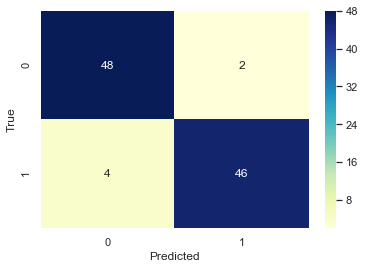

In [18]:
from sklearn.metrics import confusion_matrix
log_preds = log_model.predict(X)
cm = confusion_matrix(y,log_preds)
df_cm = pd.DataFrame(cm, index=[str(i) for i in np.arange(2)], columns=[str(i) for i in np.arange(2)])
sns.heatmap(df_cm,annot=True,cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")

The diagonal elements of the confusion matrix represent all the correctly classified instances whereas the off-diagonal represents all the misclassified ones.

In particular:
- The upper left corner corresponds to TNs.
- The upper right corner corresponds to FPs.
- The lower left corner corresponds to FNs.
- The lower right corner corresponds to TPs.

### Accuracy

Accuracy is defined as follows:
$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

In the context of the confusion matrix, accuracy is basically the sum of the values on the diagonals divided by the sum of all values in all cells.

This is the default metric to use under normal conditions.

### Precision, Recall and F1

There are various situations where accuracy is a poor metric to use to evaluate a classifier.

Suppose that in a particular district of a country, 50% prevalence of residents are terrorists. This country's security department has implemented a machine learning model to identify terrorists. Residents identified as terrorists will be executed. Which confusion matrix do you think their officials would rather see?

[Text(607.4818181818181, 0.5, 'True'),
 Text(0.5, 12.5, 'Predicted'),
 Text(0.5, 1, 'No False Negatives')]

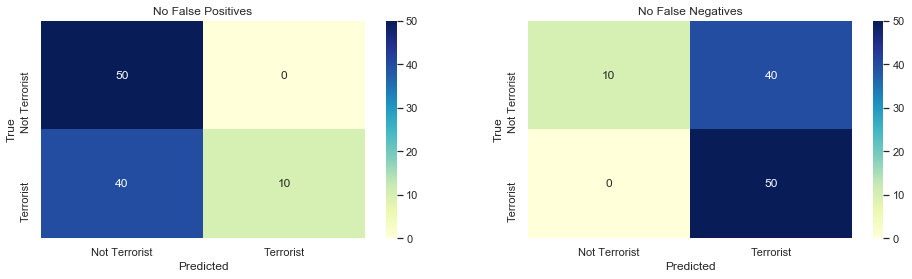

In [47]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
sns.heatmap(pd.DataFrame(np.array([[50,0],[40,10]]), 
                         index=['Not Terrorist', 'Terrorist'], 
                         columns=['Not Terrorist', 'Terrorist']),
            annot=True,
            cmap="YlGnBu",
            ax=ax[0])
sns.heatmap(pd.DataFrame(np.array([[10,40],[0,50]]), 
                         index=['Not Terrorist', 'Terrorist'], 
                         columns=['Not Terrorist', 'Terrorist']),
            annot=True,
            cmap="YlGnBu",
            ax=ax[1])
ax[0].set(xlabel='Predicted', ylabel='True',title='No False Positives')
ax[1].set(xlabel='Predicted', ylabel='True',title='No False Negatives')

If officials are more concerned about not wrongly executing innocents than killing all terrorists, we say that they are less tolerant of false positives. Hence, the metric of interest to them is precision which is defined as: 
$$Precision=\frac{TP}{TP+FP}$$

However, if officials are more concerned about killing all terrorists than not wrongly executing innocents, we say that they are less tolerant of false negatives. Hence, the metric of interest to them is recall which is defined as:
$$Recall=\frac{TN}{TN+FN}$$

To recap, if false positives are less tolerable, precision might be a better evaluation metric. If false negatives are less tolerable, recall might be a better evaluation metric.

Another situation where accuracy is not the best gauge of model performance is in the presence of severe class imbalance. Class imbalance occurs when one label class dominates the dataset, causing the classifier to tend towards classifying a data instance as the majority class. For example, when 99% of the dataset belongs to class 1.0, classifying all data instances as class 1.0 nets the classifier a 99% accuracy. This is hardly helpful. Instead, it will be better to assess the model by some metric that balances precision and recall. The F1-score, which is the harmonic mean of precision and recall, is one such metric. It is defined as:
$$F1=2*\frac{precision*recall}{precision+recall}$$